In [20]:
import pandas as pd
import numpy as np
import os
import folium
#pip install folium

In [21]:
data = pd.read_csv("data/train.csv")

In [22]:
data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [24]:
print(data.isnull().any())

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool


In [25]:
data.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [26]:
data.shape

(240000, 23)

In [27]:
data.id.describe()

count    240000.000000
mean     149969.382092
std       86634.579744
min           1.000000
25%       74930.750000
50%      149875.500000
75%      225016.500000
max      299999.000000
Name: id, dtype: float64

In [28]:
data.id.isna().value_counts()

False    240000
Name: id, dtype: int64

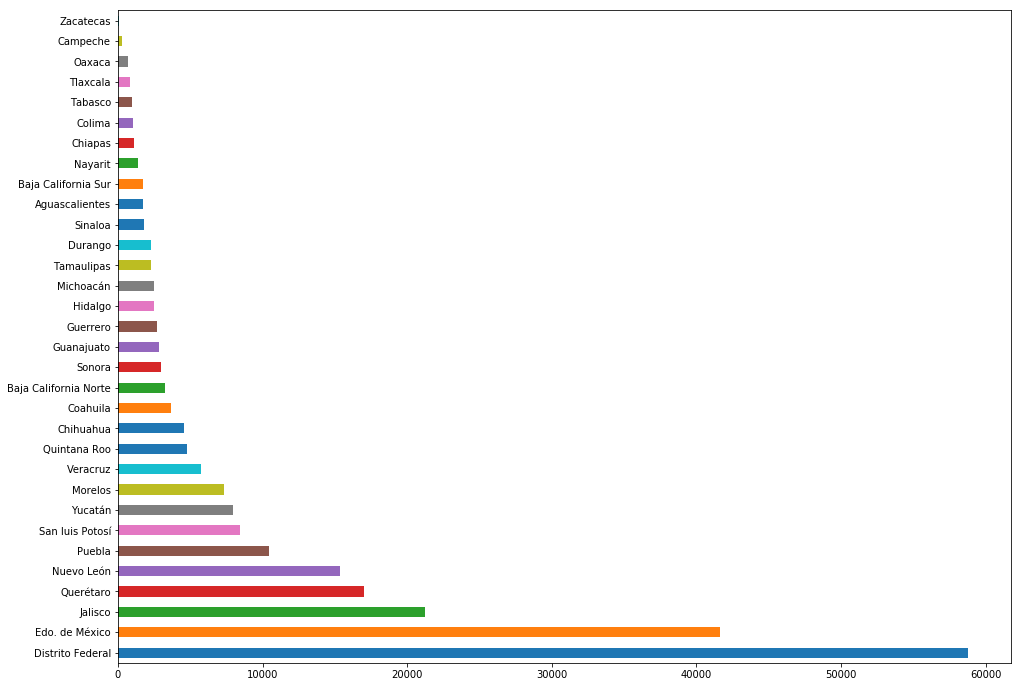

In [29]:
data['provincia'] = data['provincia'].astype('category')
data['provincia'].value_counts().plot(kind='barh', figsize=(16,12))

##Cantidad de ventas por provincia

In [30]:
data.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [31]:
groupByProvinciaAndCiudad = data.groupby(['provincia','ciudad']).size().reset_index()

In [32]:
df_provincia = data['provincia'].value_counts().to_frame().reset_index()
df_provincia.columns = ['provincia','ventas']
df_provincia

,provincia,ventas
0,Distrito Federal,58790
1,Edo. de México,41607
2,Jalisco,21238
3,Querétaro,16988
4,Nuevo León,15324
5,Puebla,10421
6,San luis Potosí,8447
7,Yucatán,7928
8,Morelos,7337
9,Veracruz,5762


In [33]:
data['fecha'] = pd.to_datetime(data['fecha'])
data['fecha'].dt.year.value_counts()

2016    94038
2015    51470
2014    40572
2013    30386
2012    23534
Name: fecha, dtype: int64

In [34]:
data.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [35]:
df_provincia

,provincia,ventas
0,Distrito Federal,58790
1,Edo. de México,41607
2,Jalisco,21238
3,Querétaro,16988
4,Nuevo León,15324
5,Puebla,10421
6,San luis Potosí,8447
7,Yucatán,7928
8,Morelos,7337
9,Veracruz,5762


In [36]:
asd = df_provincia
asd = asd[['provincia','ventas']]
states2 = asd.set_index('provincia')['ventas']
states2


provincia
Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   9

In [37]:
data.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [38]:
folium.TopoJson(
    open('data/mx_cities.json'),
    'objects.states',
    name='topojson'
).add_to(m)
m

NameError: name 'm' is not defined

In [41]:
import branca

estadosJson = []
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = states2

def style_function(feature):
    print(feature.get('properties').get('state_name'))
    estadosJson.append(feature.get('properties').get('state_name'))
    employed = employed_series.get(feature.get('properties').get('state_name'), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    open('data/mx_cities.json'),
    'objects.states',
    style_function=style_function
).add_to(m)
m
# folium.TopoJson(
#     json.loads(requests.get(county_geo).text),
#     'objects.us_counties_20m',
#     style_function=style_function
# ).add_to(m)


Distrito Federal
Guerrero
México
Morelos
Sinaloa
Baja California
Sonora
Baja California Sur
Zacatecas
Durango
Chihuahua
Colima
Nayarit
Michoacán de Ocampo
Jalisco
Chiapas
Tabasco
Oaxaca
Guanajuato
Aguascalientes
Querétaro
San Luis Potosí
Tlaxcala
Puebla
Hidalgo
Veracruz de Ignacio de la Llave
Nuevo León
Coahuila de Zaragoza
Tamaulipas
Yucatán
Campeche
Quintana Roo


In [132]:
# df_provincia[df_provincia['provincia'].isIn(estadosJson)]

display(df_provincia[~df_provincia['provincia'].isin(estadosJson)])
estadosJson2 = sorted(estadosJson)
display(estadosJson2)

#falta mapear nombre de provincias q no matchean.

,provincia,ventas
1,Edo. de México,41607
6,San luis Potosí,8447
9,Veracruz,5762
12,Coahuila,3695
13,Baja California Norte,3220
18,Michoacán,2471


['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Coahuila de Zaragoza',
 'Colima',
 'Distrito Federal',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán de Ocampo',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz de Ignacio de la Llave',
 'Yucatán',
 'Zacatecas']

In [39]:
employed_series.get(int(fet))

provincia
Distrito Federal    58790
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Puebla              10421
San luis Potosí      8447
Yucatán              7928
Morelos              7337
Veracruz             5762
Quintana Roo         4756
Chihuahua            4590
Coahuila             3695
Sonora               2988
Guanajuato           2860
Guerrero             2678
Hidalgo              2521
Michoacán            2471
Tamaulipas           2303
Durango              2275
Sinaloa              1806
Aguascalientes       1753
Nayarit              1352
Chiapas              1126
Colima               1008
Tabasco               994
Tlaxcala              839
Oaxaca                711
Campeche              263
Zacatecas              94
Baja California      4920
Name: ventas, dtype: int64